# Bar Charts

In [231]:
import pandas as pd
import matplotlib.pyplot as plt

In [232]:
def plot_bar_chart(dataframe: pd.DataFrame, x_column: str, y_column: str, colormap: str = 'viridis',
                   title: str = None, horizontal: bool = False, show_mean_median: bool = False,
                   show_number: bool = False) -> None:
    """
    Generate a bar chart using the provided DataFrame.

    Parameters:
        dataframe (pd.DataFrame): The DataFrame containing the data for the bar chart.
        x_column (str): The name of the column to be used for the x-axis of the chart.
        y_column (str): The name of the column to be used for the y-axis of the chart.
        colormap (str, optional): The name of the colormap to use for coloring the bars.
                                  Default is 'viridis'.
        title (str, optional): The title for the chart. If None, the chart will have no title.
        horizontal (bool, optional): If True, the chart will be displayed as a horizontal bar chart.
                                     Default is False (vertical bar chart).
        show_mean_median (bool, optional): If True, the mean and median values will be displayed in the top-right
                                           corner of the chart with a frame. Default is False.
        show_number (bool, optional): If True, the values of each bar will be displayed at the top of the bar.
                                      Default is False.

    Returns:
        None: The function displays the bar chart directly without returning anything.
    """

    # Step 1: Sort the DataFrame by the y_column in descending order
    df = dataframe.sort_values(by=y_column, ascending=False)

    # Create the bar plot using Matplotlib
    plt.figure(figsize=(10, 6))
    if horizontal:
        bars = plt.barh(df[x_column], df[y_column], color=plt.get_cmap(colormap)(df[y_column] / max(df[y_column])))
        plt.xlabel(y_column, labelpad=15, color='#333333', fontsize=14)
        plt.ylabel(x_column, labelpad=15, color='#333333', fontsize=14)
        plt.gca().invert_yaxis()  # Invert y-axis for horizontal bar chart
        # Display values at the top of each bar if show_number is True
        if show_number:
            for bar in bars:
                width = bar.get_width()
                plt.annotate(f'{width:.2f}', xy=(width, bar.get_y() + bar.get_height() / 2),
                             xytext=(3, 0), textcoords='offset points',
                             ha='left', va='center', fontsize=12, color='black')
    else:
        bars = plt.bar(df[x_column], df[y_column], color=plt.get_cmap(colormap)(df[y_column] / max(df[y_column])))
        plt.xlabel(x_column, labelpad=15, color='#333333', fontsize=14)
        plt.ylabel(y_column, labelpad=15, color='#333333', fontsize=14)
        # Display values at the top of each bar if show_number is True
        if show_number:
            for bar in bars:
                height = bar.get_height()
                plt.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                             xytext=(0, 3), textcoords='offset points',
                             ha='center', va='bottom', fontsize=12, color='black')

    # Display mean and median values if show_mean_median is True
    if show_mean_median:
        # Calculating mean and median
        mean_value = df[y_column].mean()
        median_value = df[y_column].median()

        # Adding mean and median values in the top-right corner of the chart with a frame
        text_to_display = f'Mean: {mean_value:.2f}\nMedian: {median_value:.2f}'
        plt.text(0.95, 0.95, text_to_display, transform=plt.gca().transAxes,
                 ha='right', va='top', fontsize=12, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

    if title:
        plt.title(title, fontweight='bold', fontsize=18, pad=15, color='#333333')

    # Remove top, right, and left spines (figure borders)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_visible(True)

    # Making the bottom spine gray
    plt.gca().spines['bottom'].set_color('gray')

    # Display the plot
    plt.tight_layout()  # Ensure all elements fit within the figure
    plt.show()


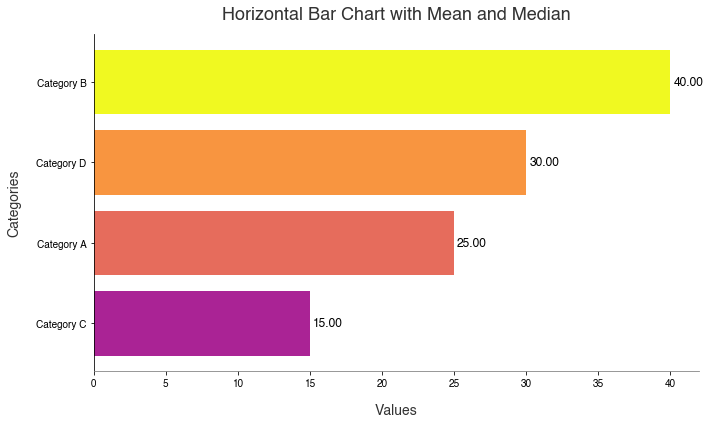

In [255]:
# Example DataFrame
data = {
    'Categories': ['Category A', 'Category B', 'Category C', 'Category D'],
    'Values': [25, 40, 15, 30]
}

df = pd.DataFrame(data)

# Using the function to create a horizontal bar chart with mean and median displayed
plot_bar_chart(dataframe=df, x_column='Categories', y_column='Values', colormap='plasma',
               title='Horizontal Bar Chart with Mean and Median', horizontal=True, show_number=True)



# Stacked Bar charts

In [234]:
def plot_stacked_bar_chart(dataframe: pd.DataFrame, x_column: str, values_column: str, group_column: str,
                           title: str = None, horizontal: bool = False, colormap: str = 'viridis') -> None:
    """
    Generate a stacked bar chart using the provided DataFrame.

    Parameters:
        dataframe (pd.DataFrame): The DataFrame containing the data for the stacked bar chart.
        x_column (str): The name of the column to be used for the x-axis of the chart.
        values_column (str): The name of the column to be used for the values of the stacked bars.
        group_column (str): The name of the column to be used for grouping the stacked bars.
        title (str, optional): The title for the chart. If None, the chart will have no title.
        horizontal (bool, optional): If True, the chart will be displayed as horizontal stacked bars.
                                     If False, the chart will be displayed as vertical stacked bars (default).
        colormap (str, optional): The name of the colormap to use for coloring the bars.
                                  Default is 'viridis'.

    Returns:
        None: The function displays the stacked bar chart directly without returning anything.
    """

    # Pivot the DataFrame to get the data in a suitable format for the stacked bar chart
    pivot_df = dataframe.pivot(index=x_column, columns=group_column, values=values_column)

    # Create the stacked bar chart using matplotlib
    plt.figure(figsize=(10, 6))

    # Generate colormap dynamically based on the number of unique categories in the group_column
    num_categories = pivot_df.shape[1]
    colormap = plt.cm.get_cmap(colormap, num_categories)

    if horizontal:
        # Plotting the horizontal stacked bars
        bottom = None
        for i, column in enumerate(pivot_df.columns):
            plt.barh(pivot_df.index, pivot_df[column], left=bottom, color=colormap(i), label=column)
            if bottom is None:
                bottom = pivot_df[column]
            else:
                bottom += pivot_df[column]

        # Adding labels and title for horizontal chart
        plt.xlabel(values_column, labelpad=15, color='#333333', fontsize=14)
        plt.ylabel(x_column, labelpad=15, color='#333333', fontsize=14)

    else:  # Vertical stacked bars (default)
        # Plotting the vertical stacked bars
        bottom = None
        for i, column in enumerate(pivot_df.columns):
            plt.bar(pivot_df.index, pivot_df[column], bottom=bottom, color=colormap(i), label=column)
            if bottom is None:
                bottom = pivot_df[column]
            else:
                bottom += pivot_df[column]

        # Adding labels and title for vertical chart
        plt.xlabel(x_column, labelpad=15, color='#333333', fontsize=14)
        plt.ylabel(values_column, labelpad=15, color='#333333', fontsize=14)

    if title:
        plt.title(title, fontweight='bold', fontsize=16, pad=15, color='#333333')

    # Adding legend
    plt.legend(pivot_df.columns)

    # Remove top, right, and left spines (figure borders)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_visible(True)

    # Making the bottom spine gray
    plt.gca().spines['bottom'].set_color('gray')

    # Display the plot
    plt.tight_layout()  # Ensure all elements fit within the figure
    plt.show()



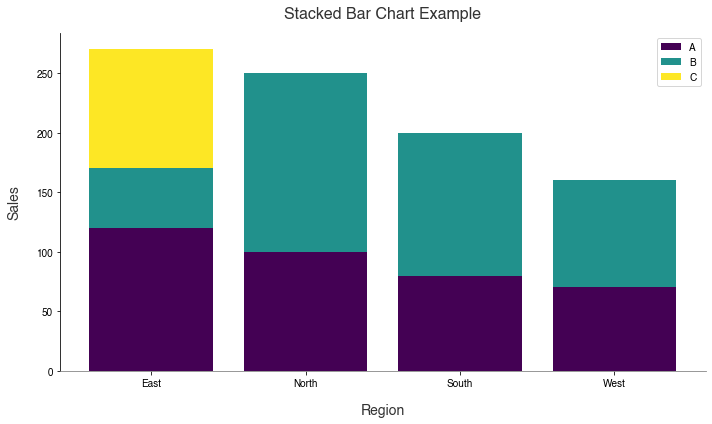

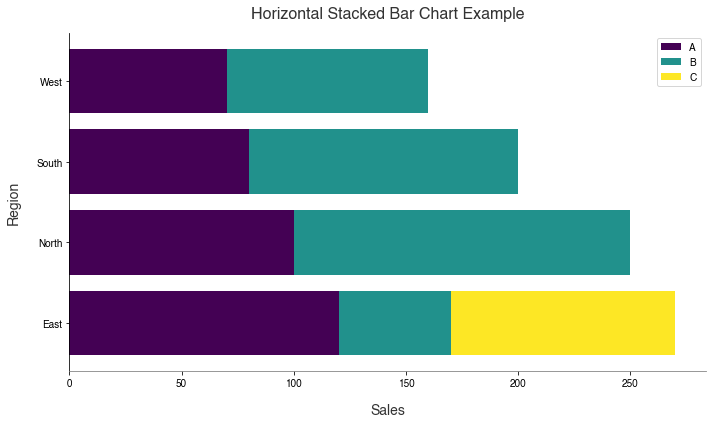

In [235]:
# Example DataFrame
data = {
    'Region': ['North', 'North', 'South', 'South', 'East', 'East', 'West', 'West', 'East'],
    'Product': ['A', 'B', 'A', 'B', 'A', 'B', 'A', 'B', 'C'],
    'Sales': [100, 150, 80, 120, 120, 50, 70, 90, 100]
}

df = pd.DataFrame(data)

# Using the function to create a vertical stacked bar chart
plot_stacked_bar_chart(dataframe=df, x_column='Region', values_column='Sales', group_column='Product',
                       title='Stacked Bar Chart Example')

# Using the function to create a horizontal stacked bar chart
plot_stacked_bar_chart(dataframe=df, x_column='Region', values_column='Sales', group_column='Product',
                       title='Horizontal Stacked Bar Chart Example', horizontal=True)


# Line Chart

In [236]:
def plot_line_chart(dataframe: pd.DataFrame, x_column: str, y_columns: list, colormap: str = 'tab20',
                    title: str = None, xlabel: str = None, ylabel: str = None) -> None:
    """
    Generate a line chart with multiple lines using the provided DataFrame.

    Parameters:
        dataframe (pd.DataFrame): The DataFrame containing the data for the line chart.
        x_column (str): The name of the column to be used for the x-axis of the chart.
        y_columns (list): The names of the columns to be used for the y-axis of the chart (multiple lines).
        colormap (str, optional): The name of the colormap to use for coloring the lines.
                                  Default is 'tab20'.
        title (str, optional): The title for the chart. If None, the chart will have no title.
        xlabel (str, optional): The label for the x-axis. If None, the x-axis will have no label.
        ylabel (str, optional): The label for the y-axis. If None, the y-axis will have no label.

    Returns:
        None: The function displays the line chart directly without returning anything.
    """

    # Create the line chart using matplotlib
    plt.figure(figsize=(10, 6))

    # Generate colormap dynamically based on the number of lines to plot
    num_lines = len(y_columns)
    colormap = plt.cm.get_cmap(colormap, num_lines)

    for i, column in enumerate(y_columns):
        plt.plot(dataframe[x_column], dataframe[column], color=colormap(i), label=column)

    # Adding labels and title
    if xlabel:
        plt.xlabel(xlabel, labelpad=15, color='#333333', fontsize=14)
    if ylabel:
        plt.ylabel(ylabel, labelpad=15, color='#333333', fontsize=14)
    if title:
        plt.title(title, fontweight='bold', fontsize=16, pad=15, color='#333333')

    # Adding legend
    plt.legend()

    # Remove top and right spines (figure borders)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    # Display the plot
    plt.tight_layout()  # Ensure all elements fit within the figure
    plt.show()




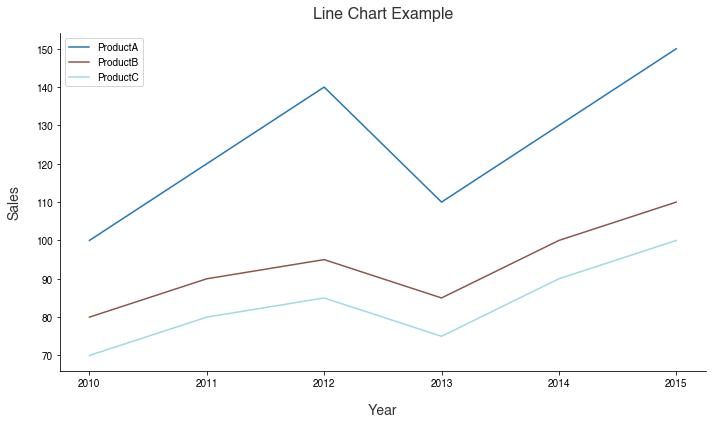

In [237]:
# Example DataFrame
data = {
    'Year': [2010, 2011, 2012, 2013, 2014, 2015],
    'ProductA': [100, 120, 140, 110, 130, 150],
    'ProductB': [80, 90, 95, 85, 100, 110],
    'ProductC': [70, 80, 85, 75, 90, 100]
}

df = pd.DataFrame(data)

# Using the function to create a line chart with multiple lines
plot_line_chart(dataframe=df, x_column='Year', y_columns=['ProductA', 'ProductB', 'ProductC'],
                title='Line Chart Example', xlabel='Year', ylabel='Sales')

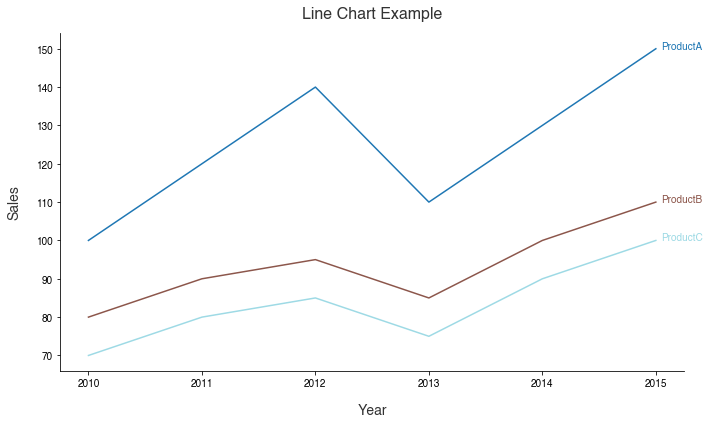

In [112]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_line_chart(dataframe: pd.DataFrame, x_column: str, y_columns: list, colormap: str = 'tab20',
                    title: str = None, xlabel: str = None, ylabel: str = None) -> None:
    """
    Generate a line chart with multiple lines using the provided DataFrame.

    Parameters:
        dataframe (pd.DataFrame): The DataFrame containing the data for the line chart.
        x_column (str): The name of the column to be used for the x-axis of the chart.
        y_columns (list): The names of the columns to be used for the y-axis of the chart (multiple lines).
        colormap (str, optional): The name of the colormap to use for coloring the lines.
                                  Default is 'tab20'.
        title (str, optional): The title for the chart. If None, the chart will have no title.
        xlabel (str, optional): The label for the x-axis. If None, the x-axis will have no label.
        ylabel (str, optional): The label for the y-axis. If None, the y-axis will have no label.

    Returns:
        None: The function displays the line chart directly without returning anything.
    """

    # Create the line chart using matplotlib
    plt.figure(figsize=(10, 6))

    # Generate colormap dynamically based on the number of lines to plot
    num_lines = len(y_columns)
    colormap = plt.cm.get_cmap(colormap, num_lines)

    for i, column in enumerate(y_columns):
        plt.plot(dataframe[x_column], dataframe[column], color=colormap(i), label=column)
        # Annotate the end of each line with the label
        plt.annotate(f"{column}", xy=(dataframe[x_column].iloc[-1], dataframe[column].iloc[-1]),
                     xytext=(5, 0), textcoords='offset points', color=colormap(i))

    # Adding labels and title
    if xlabel:
        plt.xlabel(xlabel, labelpad=15, color='#333333', fontsize=14)
    if ylabel:
        plt.ylabel(ylabel, labelpad=15, color='#333333', fontsize=14)
    if title:
        plt.title(title, fontweight='bold', fontsize=16, pad=15, color='#333333')

    # Adding legend
    #plt.legend()

    # Remove top and right spines (figure borders)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    # Display the plot
    plt.tight_layout()  # Ensure all elements fit within the figure
    plt.show()

# Example DataFrame
data = {
    'Year': [2010, 2011, 2012, 2013, 2014, 2015],
    'ProductA': [100, 120, 140, 110, 130, 150],
    'ProductB': [80, 90, 95, 85, 100, 110],
    'ProductC': [70, 80, 85, 75, 90, 100]
}

df = pd.DataFrame(data)

# Using the function to create a line chart with multiple lines
plot_line_chart(dataframe=df, x_column='Year', y_columns=['ProductA', 'ProductB', 'ProductC'],
                title='Line Chart Example', xlabel='Year', ylabel='Sales')


# Pie chart

In [239]:
def plot_pie_chart(dataframe: pd.DataFrame, category_column: str, value_column: str, colormap: str = 'tab20',
                   title: str = None) -> None:
    """
    Generate a pie chart using the provided DataFrame.

    Parameters:
        dataframe (pd.DataFrame): The DataFrame containing the data for the pie chart.
        category_column (str): The name of the column to be used for the categories of the pie chart.
        value_column (str): The name of the column to be used for the values of the pie chart.
        colormap (str, optional): The name of the colormap to use for coloring the pie slices.
                                  Default is 'tab20'.
        title (str, optional): The title for the chart. If None, the chart will have no title.

    Returns:
        None: The function displays the pie chart directly without returning anything.
    """

    # Sort the DataFrame by the value_column in descending order
    df_sorted = dataframe.sort_values(by=value_column, ascending=True)

    # Create the pie chart using matplotlib
    plt.figure(figsize=(8, 8))

    # Generate colormap dynamically based on the number of categories
    num_categories = len(df_sorted[category_column])
    colormap = plt.cm.get_cmap(colormap, num_categories)
    colors = colormap(range(num_categories))

    # Plotting the pie chart
    plt.pie(df_sorted[value_column], labels=df_sorted[category_column], autopct='%1.1f%%', colors=colors)

    # Adding title
    if title:
        plt.title(title, fontweight='bold', fontsize=16, pad=15, color='#333333')

    # Display the plot
    plt.tight_layout()  # Ensure all elements fit within the figure
    plt.show()



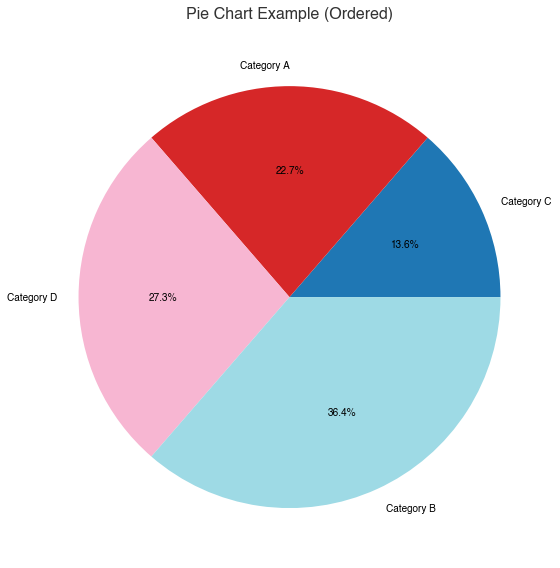

In [238]:
# Example DataFrame
data = {
    'Category': ['Category A', 'Category B', 'Category C', 'Category D'],
    'Values': [25, 40, 15, 30]
}

df = pd.DataFrame(data)

# Using the function to create a pie chart with ordered categories
plot_pie_chart(dataframe=df, category_column='Category', value_column='Values', title='Pie Chart Example (Ordered)')


# Scatter Plot

In [241]:
def plot_scatter_plot(dataframe: pd.DataFrame, x_column: str, y_column: str, colormap: str = 'tab20',
                      title: str = None, xlabel: str = None, ylabel: str = None, color_column: str = None) -> None:
    """
    Generate a scatter plot using the provided DataFrame.

    Parameters:
        dataframe (pd.DataFrame): The DataFrame containing the data for the scatter plot.
        x_column (str): The name of the column to be used for the x-axis of the chart.
        y_column (str): The name of the column to be used for the y-axis of the chart.
        colormap (str, optional): The name of the colormap to use for coloring the data points.
                                  Default is 'tab20'.
        title (str, optional): The title for the chart. If None, the chart will have no title.
        xlabel (str, optional): The label for the x-axis. If None, the x-axis will have no label.
        ylabel (str, optional): The label for the y-axis. If None, the y-axis will have no label.
        color_column (str, optional): The name of the column to be used for coloring the data points based on
                                      distinct values in this column.

    Returns:
        None: The function displays the scatter plot directly without returning anything.
    """

    # Create the scatter plot using matplotlib
    plt.figure(figsize=(10, 6))

    if color_column and color_column in dataframe:
        # Get distinct categories in the color_column
        categories = dataframe[color_column].unique()
        num_categories = len(categories)

        # Generate colormap dynamically based on the number of distinct categories
        colormap = plt.cm.get_cmap(colormap, num_categories)

        # Create a dictionary to map categories to their corresponding numeric values for coloring
        color_mapping = {category: i for i, category in enumerate(categories)}

        # Map the color_column values to their numeric values for coloring
        colors = dataframe[color_column].map(color_mapping)

        # Plotting the scatter plot with color coding
        scatter_plot = plt.scatter(dataframe[x_column], dataframe[y_column], c=colors, cmap=colormap)

        # Add labels for each category to the top right of the chart with the corresponding color indicator
        ax = plt.gca()
        for i, category in enumerate(categories):
            ax.annotate(category, xy=(1, 1), xytext=(-15, -15*(num_categories-i)), textcoords='offset points',
                        fontsize=12, color=colormap(i), ha='right', va='top')

        # Create a list of handles and labels for the legend
        handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colormap(i), markersize=8)
                   for i, _ in enumerate(categories)]
        labels = categories

        # Display the legend
        plt.legend(handles, labels, loc='upper right', title='Categories')
        
        # Remove frame for category labels
        ax.get_legend().get_frame().set_linewidth(0)
    else:
        # If color_column is not provided or not found, use blue color for all data points
        plt.scatter(dataframe[x_column], dataframe[y_column], color='blue')

    # Adding labels and title
    if xlabel:
        plt.xlabel(xlabel, labelpad=15, color='#333333', fontsize=14)
    if ylabel:
        plt.ylabel(ylabel, labelpad=15, color='#333333', fontsize=14)
    if title:
        plt.title(title, fontweight='bold', fontsize=16, pad=15, color='#333333')

    # Remove top and right spines (figure borders)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    # Display the plot
    plt.tight_layout()  # Ensure all elements fit within the figure
    plt.show()






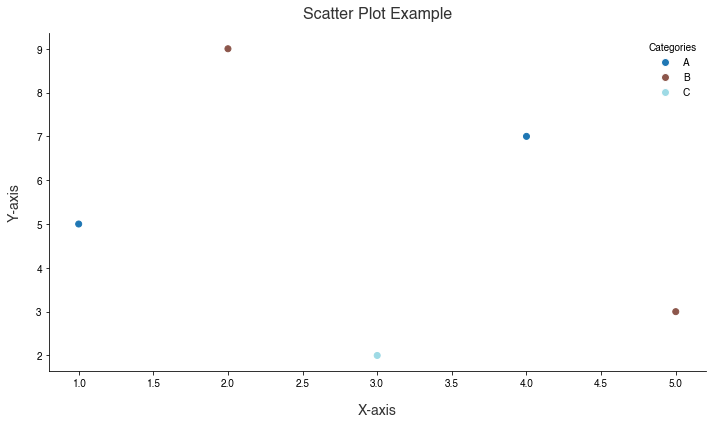

In [242]:
# Example DataFrame
data = {
    'X': [1, 2, 3, 4, 5],
    'Y': [5, 9, 2, 7, 3],
    'Category': ['A', 'B', 'C', 'A', 'B']  # New column for color grouping
}

df = pd.DataFrame(data)

# Using the function to create a scatter plot with distinct colors based on the 'Category' column
plot_scatter_plot(dataframe=df, x_column='X', y_column='Y', title='Scatter Plot Example', xlabel='X-axis', ylabel='Y-axis',
                  color_column='Category')

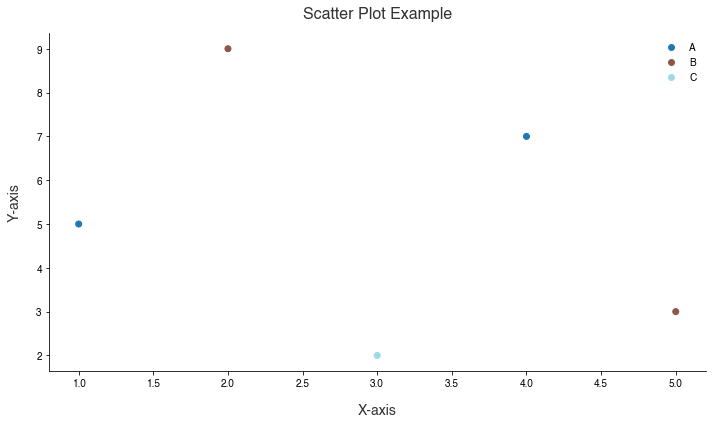

In [158]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_scatter_plot(dataframe: pd.DataFrame, x_column: str, y_column: str, colormap: str = 'tab20',
                      title: str = None, xlabel: str = None, ylabel: str = None, color_column: str = None) -> None:
    """
    Generate a scatter plot using the provided DataFrame.

    Parameters:
        dataframe (pd.DataFrame): The DataFrame containing the data for the scatter plot.
        x_column (str): The name of the column to be used for the x-axis of the chart.
        y_column (str): The name of the column to be used for the y-axis of the chart.
        colormap (str, optional): The name of the colormap to use for coloring the data points.
                                  Default is 'tab20'.
        title (str, optional): The title for the chart. If None, the chart will have no title.
        xlabel (str, optional): The label for the x-axis. If None, the x-axis will have no label.
        ylabel (str, optional): The label for the y-axis. If None, the y-axis will have no label.
        color_column (str, optional): The name of the column to be used for coloring the data points based on
                                      distinct values in this column.

    Returns:
        None: The function displays the scatter plot directly without returning anything.
    """

    # Create the scatter plot using matplotlib
    plt.figure(figsize=(10, 6))

    if color_column and color_column in dataframe:
        # Get distinct categories in the color_column
        categories = dataframe[color_column].unique()
        num_categories = len(categories)

        # Generate colormap dynamically based on the number of distinct categories
        colormap = plt.cm.get_cmap(colormap, num_categories)

        # Create a dictionary to map categories to their corresponding numeric values for coloring
        color_mapping = {category: i for i, category in enumerate(categories)}

        # Map the color_column values to their numeric values for coloring
        colors = dataframe[color_column].map(color_mapping)

        # Plotting the scatter plot with color coding
        scatter_plot = plt.scatter(dataframe[x_column], dataframe[y_column], c=colors, cmap=colormap)

        # Add labels for each category to the top right of the chart with the corresponding color indicator
        ax = plt.gca()
        for i, category in enumerate(categories):
            ax.annotate(category, xy=(1, 1), xytext=(-15, -15*(num_categories-i)), textcoords='offset points',
                        fontsize=12, color=colormap(i), ha='right', va='top')

        # Create a list of handles and labels for the legend
        handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colormap(i), markersize=8)
                   for i, _ in enumerate(categories)]
        labels = categories

        # Display the legend with an empty title
        plt.legend(handles, labels, loc='upper right', title='')

        # Remove frame for category labels
        ax.get_legend().get_frame().set_linewidth(0)

    else:
        # If color_column is not provided or not found, use blue color for all data points
        plt.scatter(dataframe[x_column], dataframe[y_column], color='blue')

    # Adding labels and title
    if xlabel:
        plt.xlabel(xlabel, labelpad=15, color='#333333', fontsize=14)
    if ylabel:
        plt.ylabel(ylabel, labelpad=15, color='#333333', fontsize=14)
    if title:
        plt.title(title, fontweight='bold', fontsize=16, pad=15, color='#333333')

    # Remove top and right spines (figure borders)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    # Display the plot
    plt.tight_layout()  # Ensure all elements fit within the figure
    plt.show()

# Example DataFrame
data = {
    'X': [1, 2, 3, 4, 5],
    'Y': [5, 9, 2, 7, 3],
    'Category': ['A', 'B', 'C', 'A', 'B']  # New column for color grouping
}

df = pd.DataFrame(data)

# Using the function to create a scatter plot with distinct colors based on the 'Category' column
plot_scatter_plot(dataframe=df, x_column='X', y_column='Y', title='Scatter Plot Example', xlabel='X-axis', ylabel='Y-axis',
                  color_column='Category')


# Bubble Chart

In [243]:
def plot_bubble_chart(dataframe: pd.DataFrame, x_column: str, y_column: str, size_column: str, colormap: str = 'tab20',
                      title: str = None, xlabel: str = None, ylabel: str = None, color_column: str = None) -> None:
    """
    Generate a bubble chart using the provided DataFrame.

    Parameters:
        dataframe (pd.DataFrame): The DataFrame containing the data for the bubble chart.
        x_column (str): The name of the column to be used for the x-axis of the chart.
        y_column (str): The name of the column to be used for the y-axis of the chart.
        size_column (str): The name of the column to be used for the size of the bubbles.
        colormap (str, optional): The name of the colormap to use for coloring the data points.
                                  Default is 'tab20'.
        title (str, optional): The title for the chart. If None, the chart will have no title.
        xlabel (str, optional): The label for the x-axis. If None, the x-axis will have no label.
        ylabel (str, optional): The label for the y-axis. If None, the y-axis will have no label.
        color_column (str, optional): The name of the column to be used for coloring the data points based on
                                      distinct values in this column.

    Returns:
        None: The function displays the bubble chart directly without returning anything.
    """

    # Create the bubble chart using matplotlib
    plt.figure(figsize=(10, 6))

    if color_column and color_column in dataframe:
        # Get distinct categories in the color_column
        categories = dataframe[color_column].unique()
        num_categories = len(categories)

        # Generate colormap dynamically based on the number of distinct categories
        colormap = plt.cm.get_cmap(colormap, num_categories)

        # Create a dictionary to map categories to their corresponding numeric values for coloring
        color_mapping = {category: i for i, category in enumerate(categories)}

        # Map the color_column values to their numeric values for coloring
        colors = dataframe[color_column].map(color_mapping)

        # Calculate the maximum value in the size_column to adjust the maximum size of the bubbles
        max_size = dataframe[size_column].max()

        # Calculate the scaling factor to fit all bubbles in the chart
        scaling_factor = 100 / max_size

        # Plotting the bubble chart with color coding and bubble sizes based on the size_column
        plt.scatter(dataframe[x_column], dataframe[y_column], c=colors, cmap=colormap,
                    s=dataframe[size_column] * scaling_factor)
    else:
        # If color_column is not provided or not found, use blue color for all data points
        max_size = dataframe[size_column].max()
        scaling_factor = 100 / max_size
        plt.scatter(dataframe[x_column], dataframe[y_column], color='blue',
                    s=dataframe[size_column] * scaling_factor)

    # Adding labels and title
    if xlabel:
        plt.xlabel(xlabel, labelpad=15, color='#333333', fontsize=14)
    if ylabel:
        plt.ylabel(ylabel, labelpad=15, color='#333333', fontsize=14)
    if title:
        plt.title(title, fontweight='bold', fontsize=16, pad=15, color='#333333')

    # Remove top and right spines (figure borders)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    # Display the plot
    plt.tight_layout()  # Ensure all elements fit within the figure
    plt.show()



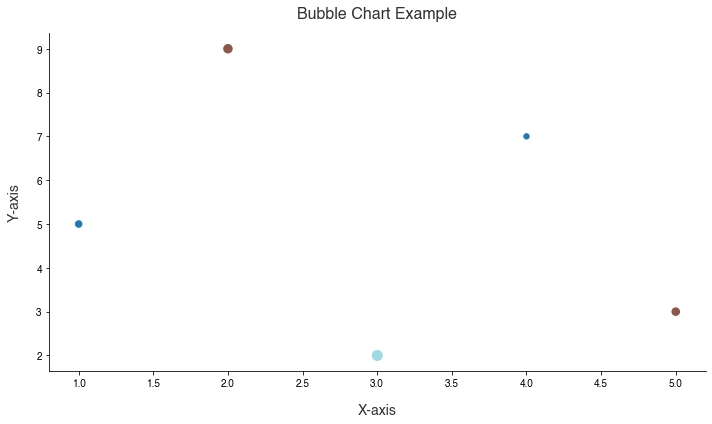

In [244]:
# Example DataFrame
data = {
    'X': [1, 2, 3, 4, 5],
    'Y': [5, 9, 2, 7, 3],
    'Size': [30, 50, 70, 20, 40],  # New column for bubble size
    'Category': ['A', 'B', 'C', 'A', 'B']  # New column for color grouping
}

df = pd.DataFrame(data)

# Using the function to create a bubble chart with distinct colors based on the 'Category' column and bubble sizes
# based on the 'Size' column
plot_bubble_chart(dataframe=df, x_column='X', y_column='Y', size_column='Size', title='Bubble Chart Example',
                  xlabel='X-axis', ylabel='Y-axis', color_column='Category')


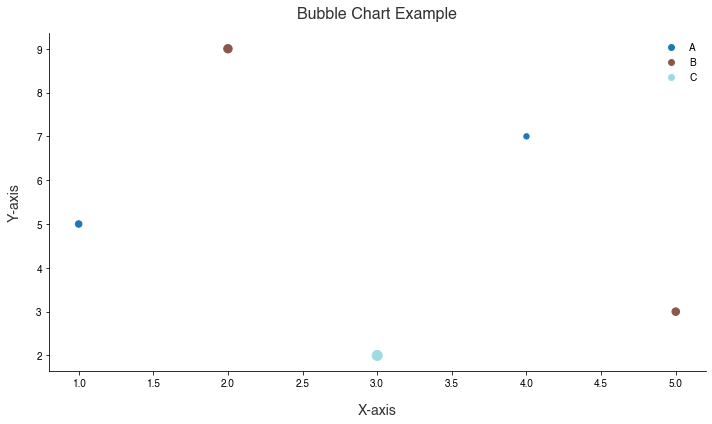

In [246]:
def plot_bubble_chart(dataframe: pd.DataFrame, x_column: str, y_column: str, size_column: str, colormap: str = 'tab20',
                      title: str = None, xlabel: str = None, ylabel: str = None, color_column: str = None) -> None:
    """
    Generate a bubble chart using the provided DataFrame.

    Parameters:
        dataframe (pd.DataFrame): The DataFrame containing the data for the bubble chart.
        x_column (str): The name of the column to be used for the x-axis of the chart.
        y_column (str): The name of the column to be used for the y-axis of the chart.
        size_column (str): The name of the column to be used for the size of the bubbles.
        colormap (str, optional): The name of the colormap to use for coloring the data points.
                                  Default is 'tab20'.
        title (str, optional): The title for the chart. If None, the chart will have no title.
        xlabel (str, optional): The label for the x-axis. If None, the x-axis will have no label.
        ylabel (str, optional): The label for the y-axis. If None, the y-axis will have no label.
        color_column (str, optional): The name of the column to be used for coloring the data points based on
                                      distinct values in this column.

    Returns:
        None: The function displays the bubble chart directly without returning anything.
    """

    # Create the bubble chart using matplotlib
    plt.figure(figsize=(10, 6))

    if color_column and color_column in dataframe:
        # Get distinct categories in the color_column
        categories = dataframe[color_column].unique()
        num_categories = len(categories)

        # Generate colormap dynamically based on the number of distinct categories
        colormap = plt.cm.get_cmap(colormap, num_categories)

        # Create a dictionary to map categories to their corresponding numeric values for coloring
        color_mapping = {category: i for i, category in enumerate(categories)}

        # Map the color_column values to their numeric values for coloring
        colors = dataframe[color_column].map(color_mapping)

        # Calculate the maximum value in the size_column to adjust the maximum size of the bubbles
        max_size = dataframe[size_column].max()

        # Calculate the scaling factor to fit all bubbles in the chart
        scaling_factor = 100 / max_size

        # Plotting the bubble chart with color coding and bubble sizes based on the size_column
        scatter_plot = plt.scatter(dataframe[x_column], dataframe[y_column], c=colors, cmap=colormap,
                                  s=dataframe[size_column] * scaling_factor)

        # Add labels for each category to the top right of the chart with the corresponding color indicator
        ax = plt.gca()
        for i, category in enumerate(categories):
            ax.annotate(category, xy=(1, 1), xytext=(-15, -15*(num_categories-i)), textcoords='offset points',
                        fontsize=12, color=colormap(i), ha='right', va='top')

        # Create a list of handles and labels for the legend
        handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colormap(i), markersize=8)
                   for i, _ in enumerate(categories)]
        labels = categories

        # Display the legend with an empty title
        plt.legend(handles, labels, loc='upper right', title='')

        # Remove frame for category labels
        ax.get_legend().get_frame().set_linewidth(0)

    else:
        # If color_column is not provided or not found, use blue color for all data points
        max_size = dataframe[size_column].max()
        scaling_factor = 100 / max_size
        plt.scatter(dataframe[x_column], dataframe[y_column], color='blue',
                    s=dataframe[size_column] * scaling_factor)

    # Adding labels and title
    if xlabel:
        plt.xlabel(xlabel, labelpad=15, color='#333333', fontsize=14)
    if ylabel:
        plt.ylabel(ylabel, labelpad=15, color='#333333', fontsize=14)
    if title:
        plt.title(title, fontweight='bold', fontsize=16, pad=15, color='#333333')

    # Remove top and right spines (figure borders)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    # Display the plot
    plt.tight_layout()  # Ensure all elements fit within the figure
    plt.show()

# Example DataFrame
data = {
    'X': [1, 2, 3, 4, 5],
    'Y': [5, 9, 2, 7, 3],
    'Size': [30, 50, 70, 20, 40],  # New column for bubble size
    'Category': ['A', 'B', 'C', 'A', 'B']  # New column for color grouping
}

df = pd.DataFrame(data)

# Using the function to create a bubble chart with distinct colors based on the 'Category' column and bubble sizes
# based on the 'Size' column
plot_bubble_chart(dataframe=df, x_column='X', y_column='Y', size_column='Size', title='Bubble Chart Example',
                  xlabel='X-axis', ylabel='Y-axis', color_column='Category')


# Heatmap

In [247]:
def plot_heatmap(dataframe: pd.DataFrame, x_column: str, y_column: str, values_column: str, colormap: str = 'viridis',
                 title: str = None, xlabel: str = None, ylabel: str = None):
    """
    Generate a heatmap using the provided DataFrame.

    Parameters:
        dataframe (pd.DataFrame): The DataFrame containing the data for the heatmap.
        x_column (str): The name of the column to be used for the x-axis of the heatmap.
        y_column (str): The name of the column to be used for the y-axis of the heatmap.
        values_column (str): The name of the column to be used for the values of the heatmap cells.
        colormap (str, optional): The name of the colormap to use for coloring the heatmap cells.
                                  Default is 'viridis'.
        title (str, optional): The title for the heatmap. If None, the heatmap will have no title.
        xlabel (str, optional): The label for the x-axis. If None, the x-axis will have no label.
        ylabel (str, optional): The label for the y-axis. If None, the y-axis will have no label.

    Returns:
        None: The function displays the heatmap directly without returning anything.
    """

    # Pivot the DataFrame to get the data in a suitable format for the heatmap
    pivot_df = dataframe.pivot(index=y_column, columns=x_column, values=values_column)

    # Create the heatmap using matplotlib
    plt.figure(figsize=(10, 6))

    # Generate colormap dynamically based on the values in the heatmap
    plt.imshow(pivot_df, cmap=colormap, interpolation='nearest')

    # Add colorbar
    cbar = plt.colorbar()
    cbar.set_label(values_column, rotation=270, labelpad=15, fontsize=14)

    # Adding labels and title
    if xlabel:
        plt.xlabel(xlabel, labelpad=15, color='#333333', fontsize=14)
    if ylabel:
        plt.ylabel(ylabel, labelpad=15, color='#333333', fontsize=14)
    if title:
        plt.title(title, fontweight='bold', fontsize=16, pad=15, color='#333333')

    # Add grid lines
    plt.grid(visible=True, linestyle='--', linewidth=0.5)

    # Add numbers inside the heatmap cells
    for i in range(len(pivot_df)):
        for j in range(len(pivot_df.columns)):
            plt.text(j, i, pivot_df.iloc[i, j], ha='center', va='center', color='w')

    # Display the plot
    plt.tight_layout()  # Ensure all elements fit within the figure
    plt.show()



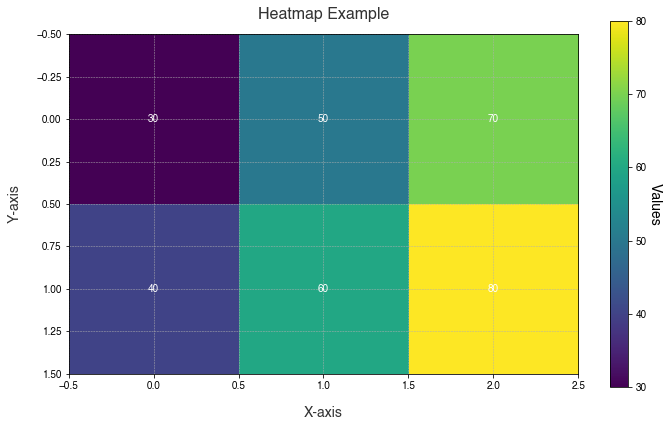

In [248]:
# Example DataFrame
data = {
    'X': [1, 1, 2, 2, 3, 3],
    'Y': [5, 6, 5, 6, 5, 6],
    'Values': [30, 40, 50, 60, 70, 80]
}

df = pd.DataFrame(data)

# Using the function to create a heatmap
plot_heatmap(dataframe=df, x_column='X', y_column='Y', values_column='Values', title='Heatmap Example',
             xlabel='X-axis', ylabel='Y-axis')


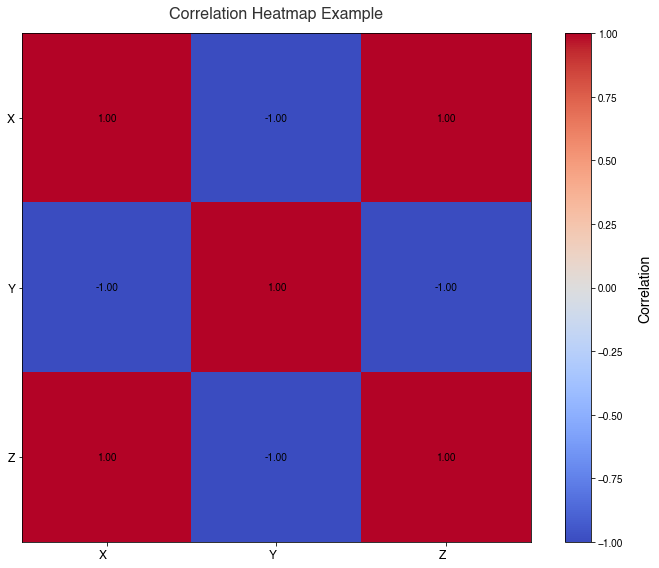

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plot_correlation_heatmap(dataframe: pd.DataFrame, colormap: str = 'coolwarm',
                             title: str = None):
    """
    Generate a correlation heatmap using the provided DataFrame.

    Parameters:
        dataframe (pd.DataFrame): The DataFrame containing the data for the correlation heatmap.
        colormap (str, optional): The name of the colormap to use for coloring the heatmap cells.
                                  Default is 'coolwarm'.
        title (str, optional): The title for the heatmap. If None, the heatmap will have no title.

    Returns:
        None: The function displays the correlation heatmap directly without returning anything.
    """

    # Calculate the correlation matrix
    corr_matrix = dataframe.corr()

    # Create the heatmap using matplotlib
    plt.figure(figsize=(10, 8))

    # Generate colormap dynamically based on the correlation values
    plt.imshow(corr_matrix, cmap=colormap, vmin=-1, vmax=1)

    # Add colorbar
    cbar = plt.colorbar()
    cbar.set_label('Correlation', labelpad=15, fontsize=14)

    # Adding labels and title
    plt.xticks(np.arange(len(corr_matrix.columns)), corr_matrix.columns, ha='right', fontsize=12)
    plt.yticks(np.arange(len(corr_matrix.index)), corr_matrix.index, fontsize=12)

    if title:
        plt.title(title, fontweight='bold', fontsize=16, pad=15, color='#333333')

    # Add grid lines
    plt.grid(visible=False)

    # Add numbers inside the heatmap cells
    for i in range(len(corr_matrix)):
        for j in range(len(corr_matrix.columns)):
            plt.text(j, i, f"{corr_matrix.iloc[i, j]:.2f}", ha='center', va='center', color='black')

    # Display the plot
    plt.tight_layout()
    plt.show()

# Example DataFrame
data = {
    'X': [1, 2, 3, 4, 5],
    'Y': [5, 4, 3, 2, 1],
    'Z': [10, 20, 30, 40, 50]
}

df = pd.DataFrame(data)

# Using the function to create a correlation heatmap
plot_correlation_heatmap(dataframe=df, title='Correlation Heatmap Example')


# Histogram

In [249]:
def plot_histogram(dataframe: pd.DataFrame, column: str, bins: int = 10,
                   colormap: str = 'viridis', title: str = None, xlabel: str = None, ylabel: str = None):
    """
    Generate a histogram using the provided DataFrame.

    Parameters:
        dataframe (pd.DataFrame): The DataFrame containing the data for the histogram.
        column (str): The name of the column to be used for the histogram.
        bins (int, optional): The number of bins to use for the histogram. Default is 10.
        colormap (str, optional): The name of the colormap to use for coloring the bars.
                                  Default is 'viridis'.
        title (str, optional): The title for the histogram. If None, the histogram will have no title.
        xlabel (str, optional): The label for the x-axis. If None, the x-axis will have no label.
        ylabel (str, optional): The label for the y-axis. If None, the y-axis will have no label.

    Returns:
        None: The function displays the histogram directly without returning anything.
    """

    # Create the histogram using matplotlib
    plt.figure(figsize=(10, 6))
    plt.hist(dataframe[column], bins=bins, color=plt.get_cmap(colormap)(0.6), edgecolor='black')

    # Adding labels and title
    if xlabel:
        plt.xlabel(xlabel, labelpad=15, color='#333333', fontsize=14)
    if ylabel:
        plt.ylabel(ylabel, labelpad=15, color='#333333', fontsize=14)
    if title:
        plt.title(title, fontweight='bold', fontsize=16, pad=15, color='#333333')

    # Remove top and right spines (figure borders)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    # Display the plot
    plt.tight_layout()
    plt.show()



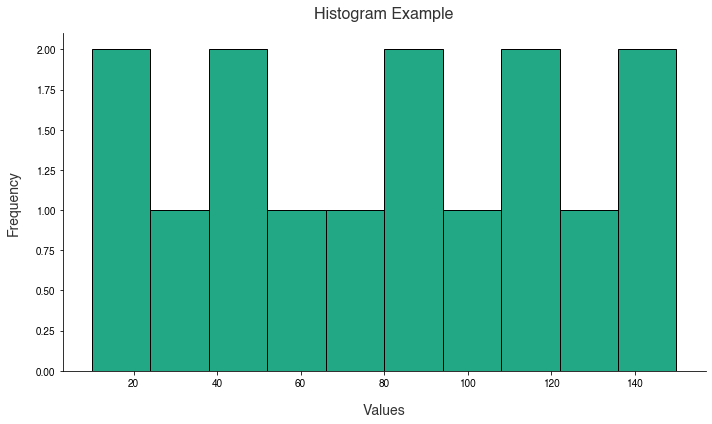

In [250]:
# Example DataFrame
data = {
    'Values': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150]
}

df = pd.DataFrame(data)

# Using the function to create a histogram
plot_histogram(dataframe=df, column='Values', bins=10, title='Histogram Example', xlabel='Values', ylabel='Frequency')


# Box Plot

In [251]:
def plot_box_plot(dataframe: pd.DataFrame, x_column: str, y_column: str,
                  colormap: str = 'viridis', title: str = None, xlabel: str = None, ylabel: str = None):
    """
    Generate a box plot using the provided DataFrame.

    Parameters:
        dataframe (pd.DataFrame): The DataFrame containing the data for the box plot.
        x_column (str): The name of the column to be used for the x-axis of the box plot.
        y_column (str): The name of the column to be used for the y-axis of the box plot.
        colormap (str, optional): The name of the colormap to use for coloring the boxes.
                                  Default is 'viridis'.
        title (str, optional): The title for the box plot. If None, the box plot will have no title.
        xlabel (str, optional): The label for the x-axis. If None, the x-axis will have no label.
        ylabel (str, optional): The label for the y-axis. If None, the y-axis will have no label.

    Returns:
        None: The function displays the box plot directly without returning anything.
    """

    # Create the box plot using matplotlib
    plt.figure(figsize=(10, 6))
    boxplot = plt.boxplot(dataframe.groupby(x_column)[y_column].apply(list), patch_artist=True)

    # Generate colormap dynamically based on the number of categories in x_column
    num_categories = len(dataframe[x_column].unique())
    colormap = plt.cm.get_cmap(colormap, num_categories)

    # Color the boxes using the colormap
    for i, box in enumerate(boxplot['boxes']):
        box.set(facecolor=colormap(i))

    # Adding labels and title
    if xlabel:
        plt.xlabel(xlabel, labelpad=15, color='#333333', fontsize=14)
    if ylabel:
        plt.ylabel(ylabel, labelpad=15, color='#333333', fontsize=14)
    if title:
        plt.title(title, fontweight='bold', fontsize=16, pad=15, color='#333333')

    # Remove top and right spines (figure borders)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    # Set x-axis tick labels to the unique values in the 'Category' column
    x_labels = dataframe[x_column].unique()
    plt.xticks(range(1, len(x_labels) + 1), x_labels)

    # Display the plot
    plt.tight_layout()
    plt.show()



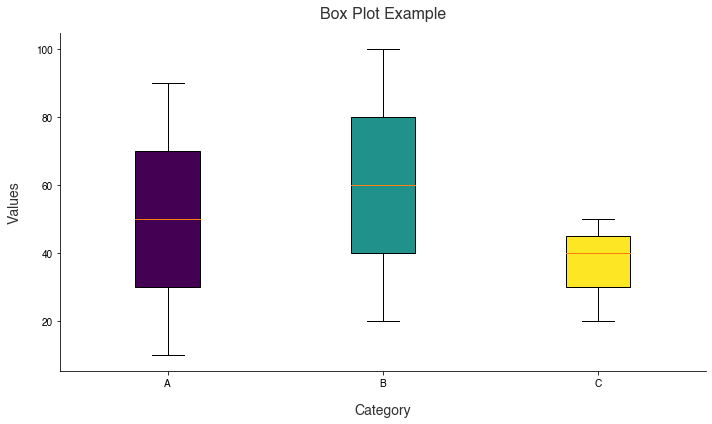

In [252]:
# Example DataFrame
data = {
    'Category': ['A', 'B', 'A', 'B', 'A', 'B', 'A', 'B', 'A', 'B', 'C', 'C', 'C'],
    'Values': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 20, 40, 50]
}

df = pd.DataFrame(data)

# Using the function to create a box plot
plot_box_plot(dataframe=df, x_column='Category', y_column='Values', title='Box Plot Example', xlabel='Category', ylabel='Values')


# Area Chart

In [253]:
def plot_area_chart(dataframe: pd.DataFrame, x_column: str, y_column: str, colormap: str = 'tab20',
                    title: str = None, xlabel: str = None, ylabel: str = None):
    """
    Generate an area chart using the provided DataFrame.

    Parameters:
        dataframe (pd.DataFrame): The DataFrame containing the data for the area chart.
        x_column (str): The name of the column to be used for the x-axis of the area chart.
        y_column (str): The name of the column to be used for the y-axis of the area chart.
        colormap (str, optional): The name of the colormap to use for coloring the area chart.
                                  Default is 'tab20'.
        title (str, optional): The title for the area chart. If None, the chart will have no title.
        xlabel (str, optional): The label for the x-axis. If None, the x-axis will have no label.
        ylabel (str, optional): The label for the y-axis. If None, the y-axis will have no label.

    Returns:
        None: The function displays the area chart directly without returning anything.
    """

    # Create the area chart using matplotlib
    plt.figure(figsize=(10, 6))
    plt.stackplot(dataframe[x_column], dataframe[y_column].values.T, labels=dataframe[y_column].columns)

    # Generate colormap dynamically based on the number of lines to plot
    num_lines = len(dataframe[y_column].columns)
    colormap = plt.cm.get_cmap(colormap, num_lines)

    # Add a legend
    plt.legend(loc='upper left')

    # Adding labels and title
    if xlabel:
        plt.xlabel(xlabel, labelpad=15, color='#333333', fontsize=14)
    if ylabel:
        plt.ylabel(ylabel, labelpad=15, color='#333333', fontsize=14)
    if title:
        plt.title(title, fontweight='bold', fontsize=16, pad=15, color='#333333')

    # Remove top and right spines (figure borders)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    # Display the plot
    plt.tight_layout()
    plt.show()



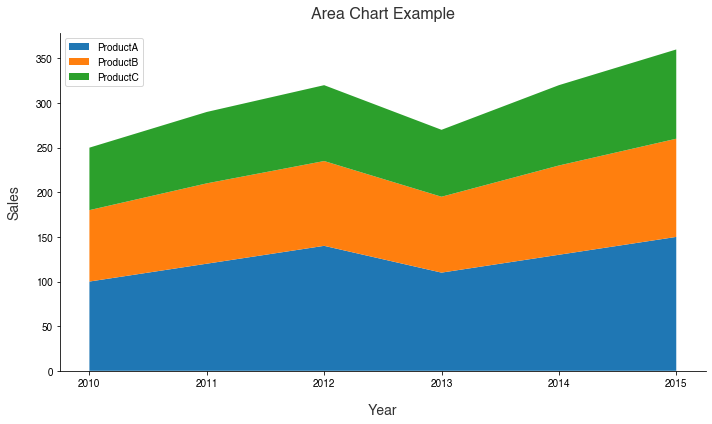

In [254]:
# Example DataFrame
data = {
    'Year': [2010, 2011, 2012, 2013, 2014, 2015],
    'ProductA': [100, 120, 140, 110, 130, 150],
    'ProductB': [80, 90, 95, 85, 100, 110],
    'ProductC': [70, 80, 85, 75, 90, 100]
}

df = pd.DataFrame(data)

# Using the function to create an area chart with multiple areas
plot_area_chart(dataframe=df, x_column='Year', y_column=['ProductA', 'ProductB', 'ProductC'],
                title='Area Chart Example', xlabel='Year', ylabel='Sales')
